In [ ]:
import sys
from os import path
sys.path.append(path.join(path.dirname(path.abspath("__file__")), '..'))

import matplotlib.pyplot as pl

import config as ac
q = 1.602176e-19 #C
meV2J=1e-3*q #meV to Joules

# Input File(s)
# -------------
ac.inputfilename = "sample-qw-barrierdope"

# Shooting method parameters for Schrödinger Equation solution
# ac.delta_E = 0.5*meV2J #Energy step (Joules) for initial search. Initial delta_E is 1 meV. 
ac.delta_E = 0.05*meV2J #Energy step (Joules) for initial search. Initial delta_E is 1 meV. #SRP trying difference convergence value

ac.d_E = 1e-5*meV2J #Energy step (Joules) within Newton-Raphson method when improving the precision of the energy of a found level.
ac.E_start = 0.0    #Energy to start shooting method from (if E_start = 0.0 uses minimum of energy of bandstructure)
ac.Estate_convergence_test = 1e-9*meV2J
# FermiDirac
ac.FD_d_E = 1e-9 #Initial and minimum Energy step (meV) for derivative calculation for Newton-Raphson method to find E_F
ac.FD_convergence_test = 1e-6 #meV
ac.np_d_E = 1.0 # Energy step (meV) for dispersion calculations
# Poisson Loop
ac.damping = 0.5    #averaging factor between iterations to smooth convergence.
ac.max_iterations=80 #maximum number of iterations.
ac.convergence_test=1e-6 #convergence is reached when the ground state energy (meV) is stable to within this number between iterations.

# Output Files
# ------------

notebook_name = "x_sweep"
# filename_without_extension = path.splitext(path.basename("tutoria1_sef_consistent_debugging.ipynb"))[0]

ac.output_directory = notebook_name
ac.parameters = True
ac.electricfield_out = True
ac.potential_out = True
ac.sigma_out = True
ac.probability_out = True
ac.states_out = True

# Result Viewer
# -------------
ac.resultviewer = True
ac.wavefunction_scalefactor = 200 # scales wavefunctions when plotting QW diagrams
# Messages
# --------
ac.messagesoff = False
ac.logfile = 'aestimo.log'

#Here, we will alter the default settings of the config.py file for the purposes of this tutorial
ac.use_cython = False
# ac.messagesoff = True

In [ ]:
# TEMPERATURE
T = 300.0 #Kelvin

# COMPUTATIONAL SCHEME
# 0: Schrodinger
# 1: Schrodinger + nonparabolicity
# 2: Schrodinger-Poisson
# 3: Schrodinger-Poisson with nonparabolicity
# 4: Schrodinger-Exchange interaction
# 5: Schrodinger-Poisson + Exchange interaction
# 6: Schrodinger-Poisson + Exchange interaction with nonparabolicity
# 7: Schrodinger-Poisson-Drift_Diffusion (Schrodinger solved with poisson then  poisson and DD)
# 8: Schrodinger-Poisson-Drift_Diffusion (Schrodinger solved with poisson and DD)
# 9: Schrodinger-Poisson-Drift_Diffusion (Schrodinger solved with poisson and DD) using Gummel & Newton map
computation_scheme = 2

# QUANTUM
# Total subband number to be calculated for electrons
subnumber_h = 1
subnumber_e = 1
# APPLIED ELECTRIC FIELD
Fapplied = 0.00#/50e-9 # (V/m)
vmax= 1.8
vmin= 0.0
Each_Step=0.05
# --------------------------------
# REGIONAL SETTINGS FOR SIMULATION
# --------------------------------

# GRID
# For 1D, z-axis is choosen
gridfactor = 0.5 #nm
maxgridpoints = 200000 #for controlling the size
mat_type='Zincblende'
# REGIONS
# Region input is a two-dimensional list input.
# An example:
# Si p-n diode. Firstly lets picturize the regional input.
#         | Thickness (nm) | Material | Alloy fraction | Doping(cm^-3) | n or p type |
# Layer 0 |      250.0     |   Si     |      0         |     1e16      |     n       |
# Layer 1 |      250.0     |   Si     |      0         |     1e16      |     p       |
#
# To input this list in Gallium, we use lists as:
material =[ [ 200.0, 'AlGaAs', 0.3, 0.0, 5e17, 'p','b'],
            [ 2.0, 'AlGaAs', 0.3, 0.0, 5e17, 'p','b'],
            [ 2.0, 'AlGaAs', 0.3, 0.0, 0.0, 'p','b'],
            [ 3.0, 'GaAs', 0.0, 0.0, 0.0, 'p','w'],
            [ 8.0, 'AlGaAs', 0.3, 0.0, 0.0, 'p','b'],
            [ 3.0, 'GaAs', 0.0, 0.0, 0.0, 'p','w'],
            [ 8.0, 'AlGaAs', 0.3, 0.0, 0.0, 'p','b'],
            [ 3.0, 'GaAs', 0.0, 0.0, 0.0, 'p','w'],
            [ 8.0, 'AlGaAs', 0.3, 0.0, 0.0, 'p','b'],
            [ 3.0, 'GaAs', 0.0, 0.0, 0.0, 'p','w'],
            [ 2.0, 'AlGaAs', 0.3, 0.0, 0.0, 'p','b'],
            [ 2.0, 'AlGaAs', 0.3, 0.0, 5e17, 'n','b'],
            [ 200.0, 'AlGaAs', 0.3, 0.0, 5e17, 'n','b']]
 
import numpy as np
x_max = sum([layer[0] for layer in material])
def round2int(x):
    return int(x+0.5)
n_max=round2int(x_max/gridfactor)
#----------------------------------------
dop_profile=np.zeros(n_max)
#----------------------------------------
Quantum_Regions=False
Quantum_Regions_boundary=np.zeros((2,2))
#----------------------------------------  
surface=np.zeros(2)

WARNING aestimo logs automatically to aestimo.log in the example's directory.
WARNING psi_at_inf_cython module not found
INFO Total layer number: 5
INFO Total number of materials in database: 25
INFO Ntotal2d 5e+15 m**-2
INFO Iteration: 1
INFO Working for subband no: 1
INFO Working for subband no: 2
INFO E[0]= 992.980073 meV
INFO E[1]= 1116.014449 meV
INFO meff[0]= 0.066000
INFO meff[1]= 0.075855
INFO N[0]= 5e+15 m**-2
INFO N[1]= 0 m**-2
INFO Efermi (at 4K) = 1010.99 meV
INFO total donor charge = 5e+15 m**-2
INFO total level charge = 5e+15 m**-2
INFO total system charge = 127.703 m**-2
INFO Iteration: 2
INFO Working for subband no: 1
INFO Working for subband no: 2
INFO E[0]= 1006.548550 meV
INFO E[1]= 1125.605811 meV
INFO meff[0]= 0.066023
INFO meff[1]= 0.075955
INFO N[0]= 5e+15 m**-2
INFO N[1]= 0 m**-2
INFO Efermi (at 4K) = 1024.38 meV
INFO total donor charge = 5e+15 m**-2
INFO total level charge = 5e+15 m**-2
INFO total system charge = 148.422 m**-2
INFO Iteration: 3
INFO Working for

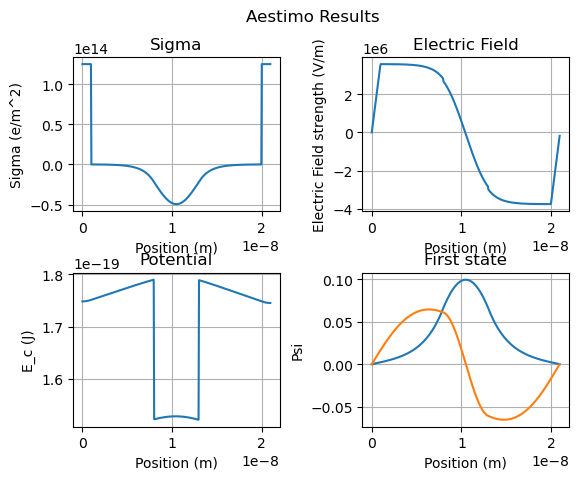

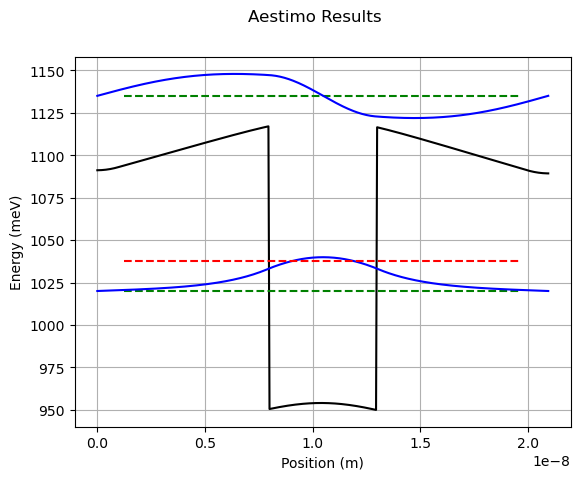

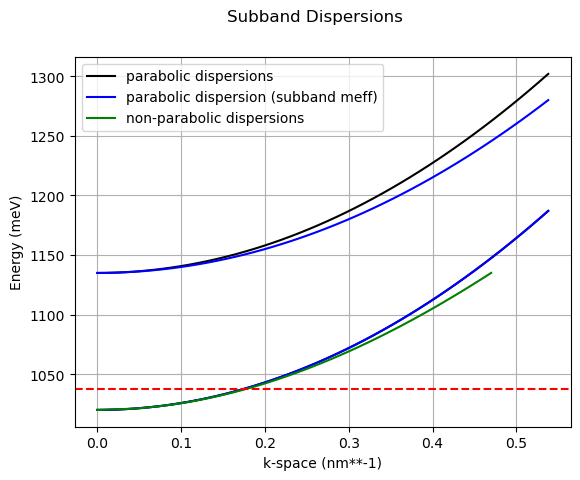

INFO Simulation is finished.


In [4]:
import aestimo as solver
import database as adatabase
# Initialise structure class
structure = s
model = solver.StructureFrom(structure,adatabase) # structure could also be a dictionary.
    
#calculate QW states
result = solver.Poisson_Schrodinger(model)


# Write the simulation results in files
%matplotlib inline
solver.save_and_plot(result,model)
solver.logger.info("Simulation is finished.")

state, Energy, Population, effective mass
     ,meV    , cm**-2    , m_e**-1
    0    1020       5e+11, 6.02e-32
    1 1134.95           0, 6.93e-32
state, Energy offset from GaAs CBM
     ,meV  
    0 70.0389
    1 184.984


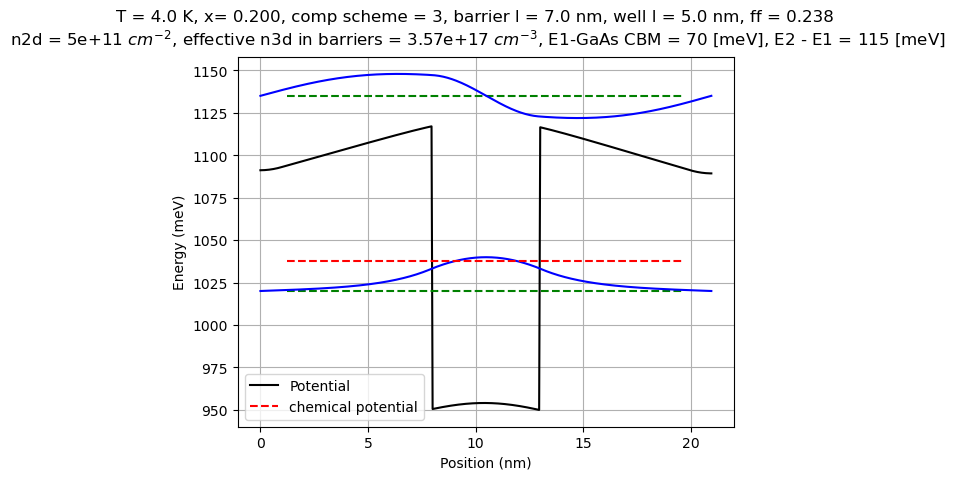

In [5]:
import numpy as np
pot_GaAs = np.min(result.fitot)/meV2J  # GaAs CBM
pot_AlGaAs = np.max(result.fitot)/meV2J  # AlGaAs CBM

print('state, Energy, Population, effective mass')
print('     ,meV    , cm**-2    , m_e**-1')
for num,E,N,meff in zip(range(result.subnumber_e),result.E_state,result.N_state,result.meff_state):
    print('%5d %7g %11.3g, %7.3g' %(num,E,N*1e-4,meff))

print('state, Energy offset from GaAs CBM')
print('     ,meV  ')
for num,E in zip(range(result.subnumber_e),result.E_state):
    print('%5d %7g' %(num,E-pot_GaAs))

E21 = result.E_state[1] - result.E_state[0]  # E21 is the energy difference between the first two states
EFCBM = result.E_F - pot_GaAs  # Fermi level with respect to GaAs CBM
Ntotal2d = sum(model.dop) * model.dx #m^-2
Ntotal3d = Ntotal2d /(2*barrier_l*1e-9)
ff = well_l/(well_l + 2*barrier_l + 2*dopant_length)

# title = r"T = %g K, x= %0.3f, dopant = %g $10^{18} cm^{-2}$, comp scheme = %g, E21 = %0.2f meV, EF - GaAsCBM = %0.2f meV" % (s.T,x_frac,Ntotal2d,s.computation_scheme,E21,EFCBM)
# title = r"T = %g K, x= %0.3f, dopant = %g $cm^{-2}$, comp scheme = %g, barrier l = %g nm \n well l = %g nm, E1-GaAs CBM = %g [meV]" % (s.T,x_frac,Ntotal2d*1e-4,s.computation_scheme,barrier_l, well_l,result.E_state[0]-pot_GaAs)

title = (
    f"T = {s.T} K, x= {x_frac:.3f}, comp scheme = {s.computation_scheme}, barrier l = {barrier_l} nm, well l = {well_l} nm, ff = {ff:.3g} \n"
    f"n2d = {Ntotal2d*1e-4:.3g} $cm^{{-2}}$, effective n3d in barriers = {Ntotal3d*1e-6:.3g} $cm^{{-3}}$, E1-GaAs CBM = {result.E_state[0]-pot_GaAs:.3g} [meV], E2 - E1 = {E21:.3g} [meV]"
)


fig_titled = plot_QW_view(result, title)


In [6]:
result.N_state

[4999999999999453.0, 0.0]

In [7]:
Ntotal2d = sum(model.dop) * model.dx
print('Total doping density: %g cm^-2' % ( Ntotal2d * 1e-4))  # converting to cm^-2

Total doping density: 5e+11 cm^-2


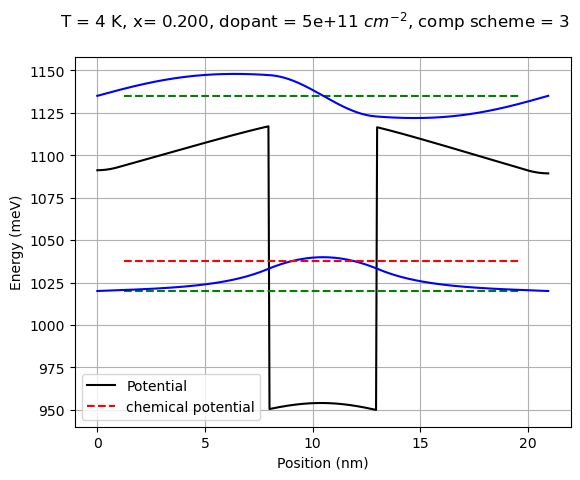

In [8]:
title = r"T = %g K, x= %0.3f, dopant = %g $cm^{-2}$, comp scheme = %g" % (s.T,x_frac,Ntotal2d*1e-4,s.computation_scheme)

fig_titled = plot_QW_view(result, title)

In [9]:
#effective 3d density
Ntotal3d = Ntotal2d * model.dx * 1e-7 #cm^-3
print('Total doping density: %g cm^-3' % ( Ntotal3d ))

Total doping density: 0.025 cm^-3


In [10]:
result.E_state[0]

1020.0025945141288

In [11]:
result.E_state[1] - result.E_state[0]  # E21 is the energy difference between the first two states

114.94527049128692

In [12]:
model.dz

AttributeError: 'StructureFrom' object has no attribute 'dz'